In [1]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

import pandas as pd
import seaborn as sns
import random

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

from sklearn.metrics import precision_recall_curve

%matplotlib inline
sys.path.append("..")

# Faster RCNN ResNet50

In [2]:
MODEL_NAME = 'object_detection/saved_models/faster_rcnn_resnet50_ship_v3'
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABELS = os.path.join('object_detection/data', 'ship_label_map.pbtxt')
NUM_CLASSES = 7
THRESHOLD = 0.5

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

eval_images_dir = 'eval_images'
eval_images_list = os.listdir(eval_images_dir)

fishing_img_list = []
merchant_img_list = []
passenger_img_list = []
sailing_img_list = []
small_img_list = []
tug_img_list = []
warship_img_list = []
for img in eval_images_list:
    category = img.split('_')[0]
    if category == 'fishing':
        img = os.path.join('eval_images', img)
        fishing_img_list.append(img)
    elif category == 'merchant':
        img = os.path.join('eval_images', img)
        merchant_img_list.append(img)
    elif category == 'passenger':
        img = os.path.join('eval_images', img)
        passenger_img_list.append(img)
    elif category == 'sailing':
        img = os.path.join('eval_images', img)
        sailing_img_list.append(img)
    elif category == 'small':
        img = os.path.join('eval_images', img)
        small_img_list.append(img)
    elif category == 'tug':
        img = os.path.join('eval_images', img)
        tug_img_list.append(img)
    elif category == 'warship':
        img = os.path.join('eval_images', img)
        warship_img_list.append(img)

## 1. fishing evaluation

In [3]:
fishing_true = []
fishing_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in fishing_img_list:
            image = Image.open(image_path)
            try:
                image_np = load_image_into_numpy_array(image)
                image_np_expanded = np.expand_dims(image_np, axis=0)
                (boxes, scores, classes, num) = sess.run(
                    [detection_boxes, detection_scores, detection_classes, num_detections],
                    feed_dict={image_tensor: image_np_expanded})
                vis_util.visualize_boxes_and_labels_on_image_array(
                    image_np,
                    np.squeeze(boxes),
                    np.squeeze(classes).astype(np.int32),
                    np.squeeze(scores),
                    category_index,
                    use_normalized_coordinates=True,
                    min_score_thresh=THRESHOLD,
                    line_thickness=4)

                ################### Data analysis ###################
                get_scores = np.squeeze(scores)
                get_category = np.array([category_index.get(i) for i in classes[0]])
                get_boxes = np.squeeze(boxes)

                count_objects = 0
                count_category = np.array([])
                count_score = np.array([])
                for i in range(len(get_scores)):
                    if scores is None or get_scores[i] > THRESHOLD:
                        count_objects = count_objects + 1
                        count_category = np.append(count_category, get_category[i])
                        count_score = np.append(count_score, get_scores[i])
                        for i in range(len(count_category)):
                            if count_category[i]['name'] == 'fishing':
                                fishing_true.append(True)
                                fishing_score.append(count_score[i])
                            else:
                                fishing_true.append(False)
                                fishing_score.append(count_score[i])
#                         if get_category[i]['name'] == 'fishing':
#                             fishing_true.append(True)
#                             fishing_score.append(sum(count_score) / len(count_score))
#                         else:
#                             fishing_true.append(False)
#                             fishing_score.append(sum(count_score) / len(count_score))
            except Exception as e:
                print(e)
                print(image_path)
                pass
            #####################################################

## 2. merchant evaluation

In [4]:
merchant_true = []
merchant_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in merchant_img_list:
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                min_score_thresh=THRESHOLD,
                line_thickness=4)

            ################### Data analysis ###################
            get_scores = np.squeeze(scores)
            get_category = np.array([category_index.get(i) for i in classes[0]])
            get_boxes = np.squeeze(boxes)

            count_objects = 0
            count_category = np.array([])
            count_score = np.array([])
            for i in range(len(get_scores)):
                if scores is None or get_scores[i] > THRESHOLD:
                    count_objects = count_objects + 1
                    count_category = np.append(count_category, get_category[i])
                    count_score = np.append(count_score, get_scores[i])
                    for i in range(len(count_category)):
                        if count_category[i]['name'] == 'merchant':
                            merchant_true.append(True)
                            merchant_score.append(count_score[i])      
                        else:
                            merchant_true.append(False)
                            merchant_score.append(count_score[i])
#                     if get_category[i]['name'] == 'merchant':
#                         merchant_true.append(True)
#                         merchant_score.append(sum(count_score) / len(count_score))
#                     else:
#                         merchant_true.append(False)
#                         merchant_score.append(sum(count_score) / len(count_score))
            #####################################################  

## 3. passenger evaluation

In [5]:
passenger_true = []
passenger_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in passenger_img_list:
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                min_score_thresh=THRESHOLD,
                line_thickness=4)

            ################### Data analysis ###################
            get_scores = np.squeeze(scores)
            get_category = np.array([category_index.get(i) for i in classes[0]])
            get_boxes = np.squeeze(boxes)

            count_objects = 0
            count_category = np.array([])
            count_score = np.array([])
            for i in range(len(get_scores)):
                if scores is None or get_scores[i] > THRESHOLD:
                    count_objects = count_objects + 1
                    count_category = np.append(count_category, get_category[i])
                    count_score = np.append(count_score, get_scores[i])
                    for i in range(len(count_category)):
                        if count_category[i]['name'] == 'passenger':
                            passenger_true.append(True)
                            passenger_score.append(count_score[i])     
                        else:
                            passenger_true.append(False)
                            passenger_score.append(count_score[i])
#                     if get_category[i]['name'] == 'passenger':
#                         passenger_true.append(True)
#                         passenger_score.append(sum(count_score) / len(count_score))
#                     else:
#                         passenger_true.append(False)
#                         passenger_score.append(sum(count_score) / len(count_score))
            #####################################################  

## 4. sailing evaluation

In [6]:
sailing_true = []
sailing_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in sailing_img_list:
            image = Image.open(image_path)
            try:
                image_np = load_image_into_numpy_array(image)
                image_np_expanded = np.expand_dims(image_np, axis=0)
                (boxes, scores, classes, num) = sess.run(
                    [detection_boxes, detection_scores, detection_classes, num_detections],
                    feed_dict={image_tensor: image_np_expanded})
                vis_util.visualize_boxes_and_labels_on_image_array(
                    image_np,
                    np.squeeze(boxes),
                    np.squeeze(classes).astype(np.int32),
                    np.squeeze(scores),
                    category_index,
                    use_normalized_coordinates=True,
                    min_score_thresh=THRESHOLD,
                    line_thickness=4)

                ################### Data analysis ###################
                get_scores = np.squeeze(scores)
                get_category = np.array([category_index.get(i) for i in classes[0]])
                get_boxes = np.squeeze(boxes)

                count_objects = 0
                count_category = np.array([])
                count_score = np.array([])
                for i in range(len(get_scores)):
                    if scores is None or get_scores[i] > THRESHOLD:
                        count_objects = count_objects + 1
                        count_category = np.append(count_category, get_category[i])
                        count_score = np.append(count_score, get_scores[i])
                        for i in range(len(count_category)):
                            if count_category[i]['name'] == 'sailing':
                                sailing_true.append(True)
                                sailing_score.append(count_score[i])    
                            else:
                                sailing_true.append(False)
                                sailing_score.append(count_score[i])
#                         if get_category[i]['name'] == 'sailing':
#                             sailing_true.append(True)
#                             sailing_score.append(sum(count_score) / len(count_score))
#                         else:
#                             sailing_true.append(False)
#                             sailing_score.append(sum(count_score) / len(count_score))
            except Exception as e:
                print(e)
                print(image_path)
                pass
            #####################################################  

## 5. small evaluation

In [7]:
small_true = []
small_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in small_img_list:
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                min_score_thresh=THRESHOLD,
                line_thickness=4)

            ################### Data analysis ###################
            get_scores = np.squeeze(scores)
            get_category = np.array([category_index.get(i) for i in classes[0]])
            get_boxes = np.squeeze(boxes)

            count_objects = 0
            count_category = np.array([])
            count_score = np.array([])
            for i in range(len(get_scores)):
                if scores is None or get_scores[i] > THRESHOLD:
                    count_objects = count_objects + 1
                    count_category = np.append(count_category, get_category[i])
                    count_score = np.append(count_score, get_scores[i])
                    for i in range(len(count_category)):
                        if count_category[i]['name'] == 'small':
                            small_true.append(True)
                            small_score.append(count_score[i]) 
                        else:
                            small_true.append(False)
                            small_score.append(count_score[i])
#                     if get_category[i]['name'] == 'small':
#                         small_true.append(True)
#                         small_score.append(sum(count_score) / len(count_score))
#                     else:
#                         small_true.append(False)
#                         small_score.append(sum(count_score) / len(count_score))
            #####################################################  

## 6. tug evaluation

In [8]:
tug_true = []
tug_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in tug_img_list:
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                min_score_thresh=THRESHOLD,
                line_thickness=4)

            ################### Data analysis ###################
            get_scores = np.squeeze(scores)
            get_category = np.array([category_index.get(i) for i in classes[0]])
            get_boxes = np.squeeze(boxes)

            count_objects = 0
            count_category = np.array([])
            count_score = np.array([])
            for i in range(len(get_scores)):
                if scores is None or get_scores[i] > THRESHOLD:
                    count_objects = count_objects + 1
                    count_category = np.append(count_category, get_category[i])
                    count_score = np.append(count_score, get_scores[i])
                    for i in range(len(count_category)):
                        if count_category[i]['name'] == 'tug':
                            tug_true.append(True)
                            tug_score.append(count_score[i])
                        else:
                            tug_true.append(False)
                            tug_score.append(count_score[i])
#                     if get_category[i]['name'] == 'tug':
#                         tug_true.append(True)
#                         tug_score.append(sum(count_score) / len(count_score))
#                     else:
#                         tug_true.append(False)
#                         tug_score.append(sum(count_score) / len(count_score))
            #####################################################  

## 7. warship evaluation

In [9]:
warship_true = []
warship_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in warship_img_list:
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                min_score_thresh=THRESHOLD,
                line_thickness=4)

            ################### Data analysis ###################
            get_scores = np.squeeze(scores)
            get_category = np.array([category_index.get(i) for i in classes[0]])
            get_boxes = np.squeeze(boxes)

            count_objects = 0
            count_category = np.array([])
            count_score = np.array([])
            for i in range(len(get_scores)):
                if scores is None or get_scores[i] > THRESHOLD:
                    count_objects = count_objects + 1
                    count_category = np.append(count_category, get_category[i])
                    count_score = np.append(count_score, get_scores[i])
                    for i in range(len(count_category)):
                        if count_category[i]['name'] == 'warship':
                            warship_true.append(True)
                            warship_score.append(count_score[i])   
                        else:
                            warship_true.append(False)
                            warship_score.append(count_score[i])
#                     if get_category[i]['name'] == 'warship':
#                         warship_true.append(True)
#                         warship_score.append(sum(count_score) / len(count_score))
#                     else:
#                         warship_true.append(False)
#                         warship_score.append(sum(count_score) / len(count_score))
            #####################################################  

In [10]:
faster_rcnn_fishing_true = fishing_true
faster_rcnn_merchant_true = merchant_true
faster_rcnn_passenger_true = passenger_true
faster_rcnn_sailing_true = sailing_true
faster_rcnn_small_true = small_true
faster_rcnn_tug_true = tug_true
faster_rcnn_warship_true = warship_true

faster_rcnn_fishing_score = fishing_score
faster_rcnn_merchant_score = merchant_score
faster_rcnn_passenger_score = passenger_score
faster_rcnn_sailing_score = sailing_score
faster_rcnn_small_score = small_score
faster_rcnn_tug_score = tug_score
faster_rcnn_warship_score = warship_score

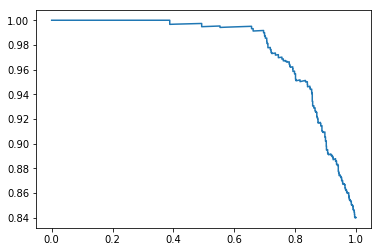

In [11]:
faster_rcnn_true = fishing_true + merchant_true + passenger_true + sailing_true + small_true + tug_true + warship_true
faster_rcnn_score = fishing_score + merchant_score + passenger_score + sailing_score + small_score + tug_score + warship_score

# data_list = []
# for i in range(len(faster_rcnn_true)):
#     data_list.append((faster_rcnn_true[i], faster_rcnn_score[i]))
# data_list.sort(key=lambda x:x[1], reverse=True)

# faster_rcnn_true = []
# faster_rcnn_score = []
# for i in range(len(data_list)):
#     faster_rcnn_true.append(data_list[i][0])
#     faster_rcnn_score.append(data_list[i][1])
    
y_true = np.array(faster_rcnn_true)
y_scores = np.array(faster_rcnn_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

plt.plot(recall, precision)

# SSD MobileNet

In [12]:
MODEL_NAME = 'object_detection/saved_models/ssd_mobilenet_ship_v3'
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABELS = os.path.join('object_detection/data', 'ship_label_map.pbtxt')
NUM_CLASSES = 7
THRESHOLD = 0.5

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

eval_images_dir = 'eval_images'
eval_images_list = os.listdir(eval_images_dir)

fishing_img_list = []
merchant_img_list = []
passenger_img_list = []
sailing_img_list = []
small_img_list = []
tug_img_list = []
warship_img_list = []
for img in eval_images_list:
    category = img.split('_')[0]
    if category == 'fishing':
        img = os.path.join('eval_images', img)
        fishing_img_list.append(img)
    elif category == 'merchant':
        img = os.path.join('eval_images', img)
        merchant_img_list.append(img)
    elif category == 'passenger':
        img = os.path.join('eval_images', img)
        passenger_img_list.append(img)
    elif category == 'sailing':
        img = os.path.join('eval_images', img)
        sailing_img_list.append(img)
    elif category == 'small':
        img = os.path.join('eval_images', img)
        small_img_list.append(img)
    elif category == 'tug':
        img = os.path.join('eval_images', img)
        tug_img_list.append(img)
    elif category == 'warship':
        img = os.path.join('eval_images', img)
        warship_img_list.append(img)

## 1. fishing evaluation

In [13]:
fishing_true = []
fishing_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in fishing_img_list:
            image = Image.open(image_path)
            try:
                image_np = load_image_into_numpy_array(image)
                image_np_expanded = np.expand_dims(image_np, axis=0)
                (boxes, scores, classes, num) = sess.run(
                    [detection_boxes, detection_scores, detection_classes, num_detections],
                    feed_dict={image_tensor: image_np_expanded})
                vis_util.visualize_boxes_and_labels_on_image_array(
                    image_np,
                    np.squeeze(boxes),
                    np.squeeze(classes).astype(np.int32),
                    np.squeeze(scores),
                    category_index,
                    use_normalized_coordinates=True,
                    min_score_thresh=THRESHOLD,
                    line_thickness=4)

                ################### Data analysis ###################
                get_scores = np.squeeze(scores)
                get_category = np.array([category_index.get(i) for i in classes[0]])
                get_boxes = np.squeeze(boxes)

                count_objects = 0
                count_category = np.array([])
                count_score = np.array([])
                for i in range(len(get_scores)):
                    if scores is None or get_scores[i] > THRESHOLD:
                        count_objects = count_objects + 1
                        count_category = np.append(count_category, get_category[i])
                        count_score = np.append(count_score, get_scores[i])
                        for i in range(len(count_category)):
                            if count_category[i]['name'] == 'fishing':
                                fishing_true.append(True)
                                fishing_score.append(count_score[i])
                            else:
                                fishing_true.append(False)
                                fishing_score.append(count_score[i])
#                         if get_category[i]['name'] == 'fishing':
#                             fishing_true.append(True)
#                             fishing_score.append(sum(count_score) / len(count_score))
#                         else:
#                             fishing_true.append(False)
#                             fishing_score.append(sum(count_score) / len(count_score))
            except Exception as e:
                print(e)
                print(image_path)
                pass
            #####################################################

## 2. merchant evaluation

In [14]:
merchant_true = []
merchant_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in merchant_img_list:
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                min_score_thresh=THRESHOLD,
                line_thickness=4)

            ################### Data analysis ###################
            get_scores = np.squeeze(scores)
            get_category = np.array([category_index.get(i) for i in classes[0]])
            get_boxes = np.squeeze(boxes)

            count_objects = 0
            count_category = np.array([])
            count_score = np.array([])
            for i in range(len(get_scores)):
                if scores is None or get_scores[i] > THRESHOLD:
                    count_objects = count_objects + 1
                    count_category = np.append(count_category, get_category[i])
                    count_score = np.append(count_score, get_scores[i])
                    for i in range(len(count_category)):
                        if count_category[i]['name'] == 'merchant':
                            merchant_true.append(True)
                            merchant_score.append(count_score[i])      
                        else:
                            merchant_true.append(False)
                            merchant_score.append(count_score[i])
#                     if get_category[i]['name'] == 'merchant':
#                         merchant_true.append(True)
#                         merchant_score.append(sum(count_score) / len(count_score))
#                     else:
#                         merchant_true.append(False)
#                         merchant_score.append(sum(count_score) / len(count_score))
            #####################################################  

## 3. passenger evaluation

In [15]:
passenger_true = []
passenger_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in passenger_img_list:
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                min_score_thresh=THRESHOLD,
                line_thickness=4)

            ################### Data analysis ###################
            get_scores = np.squeeze(scores)
            get_category = np.array([category_index.get(i) for i in classes[0]])
            get_boxes = np.squeeze(boxes)

            count_objects = 0
            count_category = np.array([])
            count_score = np.array([])
            for i in range(len(get_scores)):
                if scores is None or get_scores[i] > THRESHOLD:
                    count_objects = count_objects + 1
                    count_category = np.append(count_category, get_category[i])
                    count_score = np.append(count_score, get_scores[i])
                    for i in range(len(count_category)):
                        if count_category[i]['name'] == 'passenger':
                            passenger_true.append(True)
                            passenger_score.append(count_score[i])     
                        else:
                            passenger_true.append(False)
                            passenger_score.append(count_score[i])
#                     if get_category[i]['name'] == 'passenger':
#                         passenger_true.append(True)
#                         passenger_score.append(sum(count_score) / len(count_score))
#                     else:
#                         passenger_true.append(False)
#                         passenger_score.append(sum(count_score) / len(count_score))
            #####################################################  

## 4. sailing evaluation

In [16]:
sailing_true = []
sailing_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in sailing_img_list:
            image = Image.open(image_path)
            try:
                image_np = load_image_into_numpy_array(image)
                image_np_expanded = np.expand_dims(image_np, axis=0)
                (boxes, scores, classes, num) = sess.run(
                    [detection_boxes, detection_scores, detection_classes, num_detections],
                    feed_dict={image_tensor: image_np_expanded})
                vis_util.visualize_boxes_and_labels_on_image_array(
                    image_np,
                    np.squeeze(boxes),
                    np.squeeze(classes).astype(np.int32),
                    np.squeeze(scores),
                    category_index,
                    use_normalized_coordinates=True,
                    min_score_thresh=THRESHOLD,
                    line_thickness=4)

                ################### Data analysis ###################
                get_scores = np.squeeze(scores)
                get_category = np.array([category_index.get(i) for i in classes[0]])
                get_boxes = np.squeeze(boxes)

                count_objects = 0
                count_category = np.array([])
                count_score = np.array([])
                for i in range(len(get_scores)):
                    if scores is None or get_scores[i] > THRESHOLD:
                        count_objects = count_objects + 1
                        count_category = np.append(count_category, get_category[i])
                        count_score = np.append(count_score, get_scores[i])
                        for i in range(len(count_category)):
                            if count_category[i]['name'] == 'sailing':
                                sailing_true.append(True)
                                sailing_score.append(count_score[i])    
                            else:
                                sailing_true.append(False)
                                sailing_score.append(count_score[i])
#                         if get_category[i]['name'] == 'sailing':
#                             sailing_true.append(True)
#                             sailing_score.append(sum(count_score) / len(count_score))
#                         else:
#                             sailing_true.append(False)
#                             sailing_score.append(sum(count_score) / len(count_score))
            except Exception as e:
                print(e)
                print(image_path)
                pass
            #####################################################  

## 5. small evaluation

In [17]:
small_true = []
small_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in small_img_list:
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                min_score_thresh=THRESHOLD,
                line_thickness=4)

            ################### Data analysis ###################
            get_scores = np.squeeze(scores)
            get_category = np.array([category_index.get(i) for i in classes[0]])
            get_boxes = np.squeeze(boxes)

            count_objects = 0
            count_category = np.array([])
            count_score = np.array([])
            for i in range(len(get_scores)):
                if scores is None or get_scores[i] > THRESHOLD:
                    count_objects = count_objects + 1
                    count_category = np.append(count_category, get_category[i])
                    count_score = np.append(count_score, get_scores[i])
                    for i in range(len(count_category)):
                        if count_category[i]['name'] == 'small':
                            small_true.append(True)
                            small_score.append(count_score[i]) 
                        else:
                            small_true.append(False)
                            small_score.append(count_score[i])
#                     if get_category[i]['name'] == 'small':
#                         small_true.append(True)
#                         small_score.append(sum(count_score) / len(count_score))
#                     else:
#                         small_true.append(False)
#                         small_score.append(sum(count_score) / len(count_score))
            #####################################################  

## 6. tug evaluation

In [18]:
tug_true = []
tug_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in tug_img_list:
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                min_score_thresh=THRESHOLD,
                line_thickness=4)

            ################### Data analysis ###################
            get_scores = np.squeeze(scores)
            get_category = np.array([category_index.get(i) for i in classes[0]])
            get_boxes = np.squeeze(boxes)

            count_objects = 0
            count_category = np.array([])
            count_score = np.array([])
            for i in range(len(get_scores)):
                if scores is None or get_scores[i] > THRESHOLD:
                    count_objects = count_objects + 1
                    count_category = np.append(count_category, get_category[i])
                    count_score = np.append(count_score, get_scores[i])
                    for i in range(len(count_category)):
                        if count_category[i]['name'] == 'tug':
                            tug_true.append(True)
                            tug_score.append(count_score[i])
                        else:
                            tug_true.append(False)
                            tug_score.append(count_score[i])
#                     if get_category[i]['name'] == 'tug':
#                         tug_true.append(True)
#                         tug_score.append(sum(count_score) / len(count_score))
#                     else:
#                         tug_true.append(False)
#                         tug_score.append(sum(count_score) / len(count_score))
            #####################################################  

## 7. warship evaluation

In [19]:
warship_true = []
warship_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in warship_img_list:
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                min_score_thresh=THRESHOLD,
                line_thickness=4)

            ################### Data analysis ###################
            get_scores = np.squeeze(scores)
            get_category = np.array([category_index.get(i) for i in classes[0]])
            get_boxes = np.squeeze(boxes)

            count_objects = 0
            count_category = np.array([])
            count_score = np.array([])
            for i in range(len(get_scores)):
                if scores is None or get_scores[i] > THRESHOLD:
                    count_objects = count_objects + 1
                    count_category = np.append(count_category, get_category[i])
                    count_score = np.append(count_score, get_scores[i])
                    for i in range(len(count_category)):
                        if count_category[i]['name'] == 'warship':
                            warship_true.append(True)
                            warship_score.append(count_score[i])   
                        else:
                            warship_true.append(False)
                            warship_score.append(count_score[i])
#                     if get_category[i]['name'] == 'warship':
#                         warship_true.append(True)
#                         warship_score.append(sum(count_score) / len(count_score))
#                     else:
#                         warship_true.append(False)
#                         warship_score.append(sum(count_score) / len(count_score))
            #####################################################  

In [20]:
ssd_mobilenet_fishing_true = fishing_true
ssd_mobilenet_merchant_true = merchant_true
ssd_mobilenet_passenger_true = passenger_true
ssd_mobilenet_sailing_true = sailing_true
ssd_mobilenet_small_true = small_true
ssd_mobilenet_tug_true = tug_true
ssd_mobilenet_warship_true = warship_true

ssd_mobilenet_fishing_score = fishing_score
ssd_mobilenet_merchant_score = merchant_score
ssd_mobilenet_passenger_score = passenger_score
ssd_mobilenet_sailing_score = sailing_score
ssd_mobilenet_small_score = small_score
ssd_mobilenet_tug_score = tug_score
ssd_mobilenet_warship_score = warship_score

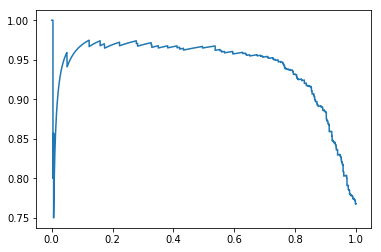

In [21]:
ssd_mobilenet_true = fishing_true + merchant_true + passenger_true + sailing_true + small_true + tug_true + warship_true
ssd_mobilenet_score = fishing_score + merchant_score + passenger_score + sailing_score + small_score + tug_score + warship_score

# data_list = []
# for i in range(len(ssd_mobilenet_true)):
#     data_list.append((ssd_mobilenet_true[i], ssd_mobilenet_score[i]))
# data_list.sort(key=lambda x:x[1], reverse=True)

# ssd_mobilenet_true = []
# ssd_mobilenet_score = []
# for i in range(len(data_list)):
#     ssd_mobilenet_true.append(data_list[i][0])
#     ssd_mobilenet_score.append(data_list[i][1])

y_true = np.array(ssd_mobilenet_true)
y_scores = np.array(ssd_mobilenet_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

plt.plot(recall, precision)

# SSD Inception

In [22]:
MODEL_NAME = 'object_detection/saved_models/ssd_inception_ship_v3'
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'
PATH_TO_LABELS = os.path.join('object_detection/data', 'ship_label_map.pbtxt')
NUM_CLASSES = 7
THRESHOLD = 0.5

detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

eval_images_dir = 'eval_images'
eval_images_list = os.listdir(eval_images_dir)

fishing_img_list = []
merchant_img_list = []
passenger_img_list = []
sailing_img_list = []
small_img_list = []
tug_img_list = []
warship_img_list = []
for img in eval_images_list:
    category = img.split('_')[0]
    if category == 'fishing':
        img = os.path.join('eval_images', img)
        fishing_img_list.append(img)
    elif category == 'merchant':
        img = os.path.join('eval_images', img)
        merchant_img_list.append(img)
    elif category == 'passenger':
        img = os.path.join('eval_images', img)
        passenger_img_list.append(img)
    elif category == 'sailing':
        img = os.path.join('eval_images', img)
        sailing_img_list.append(img)
    elif category == 'small':
        img = os.path.join('eval_images', img)
        small_img_list.append(img)
    elif category == 'tug':
        img = os.path.join('eval_images', img)
        tug_img_list.append(img)
    elif category == 'warship':
        img = os.path.join('eval_images', img)
        warship_img_list.append(img)

## 1. fishing evaluation

In [23]:
fishing_true = []
fishing_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in fishing_img_list:
            image = Image.open(image_path)
            try:
                image_np = load_image_into_numpy_array(image)
                image_np_expanded = np.expand_dims(image_np, axis=0)
                (boxes, scores, classes, num) = sess.run(
                    [detection_boxes, detection_scores, detection_classes, num_detections],
                    feed_dict={image_tensor: image_np_expanded})
                vis_util.visualize_boxes_and_labels_on_image_array(
                    image_np,
                    np.squeeze(boxes),
                    np.squeeze(classes).astype(np.int32),
                    np.squeeze(scores),
                    category_index,
                    use_normalized_coordinates=True,
                    min_score_thresh=THRESHOLD,
                    line_thickness=4)

                ################### Data analysis ###################
                get_scores = np.squeeze(scores)
                get_category = np.array([category_index.get(i) for i in classes[0]])
                get_boxes = np.squeeze(boxes)

                count_objects = 0
                count_category = np.array([])
                count_score = np.array([])
                for i in range(len(get_scores)):
                    if scores is None or get_scores[i] > THRESHOLD:
                        count_objects = count_objects + 1
                        count_category = np.append(count_category, get_category[i])
                        count_score = np.append(count_score, get_scores[i])
                        for i in range(len(count_category)):
                            if count_category[i]['name'] == 'fishing':
                                fishing_true.append(True)
                                fishing_score.append(count_score[i])
                            else:
                                fishing_true.append(False)
                                fishing_score.append(count_score[i])
#                         if get_category[i]['name'] == 'fishing':
#                             fishing_true.append(True)
#                             fishing_score.append(sum(count_score) / len(count_score))
#                         else:
#                             fishing_true.append(False)
#                             fishing_score.append(sum(count_score) / len(count_score))
            except Exception as e:
                print(e)
                print(image_path)
                pass
            #####################################################

## 2. merchant evaluation

In [24]:
merchant_true = []
merchant_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in merchant_img_list:
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                min_score_thresh=THRESHOLD,
                line_thickness=4)

            ################### Data analysis ###################
            get_scores = np.squeeze(scores)
            get_category = np.array([category_index.get(i) for i in classes[0]])
            get_boxes = np.squeeze(boxes)

            count_objects = 0
            count_category = np.array([])
            count_score = np.array([])
            for i in range(len(get_scores)):
                if scores is None or get_scores[i] > THRESHOLD:
                    count_objects = count_objects + 1
                    count_category = np.append(count_category, get_category[i])
                    count_score = np.append(count_score, get_scores[i])
                    for i in range(len(count_category)):
                        if count_category[i]['name'] == 'merchant':
                            merchant_true.append(True)
                            merchant_score.append(count_score[i])      
                        else:
                            merchant_true.append(False)
                            merchant_score.append(count_score[i])
#                     if get_category[i]['name'] == 'merchant':
#                         merchant_true.append(True)
#                         merchant_score.append(sum(count_score) / len(count_score))
#                     else:
#                         merchant_true.append(False)
#                         merchant_score.append(sum(count_score) / len(count_score))
            #####################################################  

## 3. passenger evaluation

In [25]:
passenger_true = []
passenger_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in passenger_img_list:
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                min_score_thresh=THRESHOLD,
                line_thickness=4)

            ################### Data analysis ###################
            get_scores = np.squeeze(scores)
            get_category = np.array([category_index.get(i) for i in classes[0]])
            get_boxes = np.squeeze(boxes)

            count_objects = 0
            count_category = np.array([])
            count_score = np.array([])
            for i in range(len(get_scores)):
                if scores is None or get_scores[i] > THRESHOLD:
                    count_objects = count_objects + 1
                    count_category = np.append(count_category, get_category[i])
                    count_score = np.append(count_score, get_scores[i])
                    for i in range(len(count_category)):
                        if count_category[i]['name'] == 'passenger':
                            passenger_true.append(True)
                            passenger_score.append(count_score[i])     
                        else:
                            passenger_true.append(False)
                            passenger_score.append(count_score[i])
#                     if get_category[i]['name'] == 'passenger':
#                         passenger_true.append(True)
#                         passenger_score.append(sum(count_score) / len(count_score))
#                     else:
#                         passenger_true.append(False)
#                         passenger_score.append(sum(count_score) / len(count_score))
            #####################################################  

## 4. sailing evaluation

In [26]:
sailing_true = []
sailing_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in sailing_img_list:
            image = Image.open(image_path)
            try:
                image_np = load_image_into_numpy_array(image)
                image_np_expanded = np.expand_dims(image_np, axis=0)
                (boxes, scores, classes, num) = sess.run(
                    [detection_boxes, detection_scores, detection_classes, num_detections],
                    feed_dict={image_tensor: image_np_expanded})
                vis_util.visualize_boxes_and_labels_on_image_array(
                    image_np,
                    np.squeeze(boxes),
                    np.squeeze(classes).astype(np.int32),
                    np.squeeze(scores),
                    category_index,
                    use_normalized_coordinates=True,
                    min_score_thresh=THRESHOLD,
                    line_thickness=4)

                ################### Data analysis ###################
                get_scores = np.squeeze(scores)
                get_category = np.array([category_index.get(i) for i in classes[0]])
                get_boxes = np.squeeze(boxes)

                count_objects = 0
                count_category = np.array([])
                count_score = np.array([])
                for i in range(len(get_scores)):
                    if scores is None or get_scores[i] > THRESHOLD:
                        count_objects = count_objects + 1
                        count_category = np.append(count_category, get_category[i])
                        count_score = np.append(count_score, get_scores[i])
                        for i in range(len(count_category)):
                            if count_category[i]['name'] == 'sailing':
                                sailing_true.append(True)
                                sailing_score.append(count_score[i])    
                            else:
                                sailing_true.append(False)
                                sailing_score.append(count_score[i])
#                         if get_category[i]['name'] == 'sailing':
#                             sailing_true.append(True)
#                             sailing_score.append(sum(count_score) / len(count_score))
#                         else:
#                             sailing_true.append(False)
#                             sailing_score.append(sum(count_score) / len(count_score))
            except Exception as e:
                print(e)
                print(image_path)
                pass
            #####################################################  

## 5. small evaluation

In [27]:
small_true = []
small_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in small_img_list:
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                min_score_thresh=THRESHOLD,
                line_thickness=4)

            ################### Data analysis ###################
            get_scores = np.squeeze(scores)
            get_category = np.array([category_index.get(i) for i in classes[0]])
            get_boxes = np.squeeze(boxes)

            count_objects = 0
            count_category = np.array([])
            count_score = np.array([])
            for i in range(len(get_scores)):
                if scores is None or get_scores[i] > THRESHOLD:
                    count_objects = count_objects + 1
                    count_category = np.append(count_category, get_category[i])
                    count_score = np.append(count_score, get_scores[i])
                    for i in range(len(count_category)):
                        if count_category[i]['name'] == 'small':
                            small_true.append(True)
                            small_score.append(count_score[i]) 
                        else:
                            small_true.append(False)
                            small_score.append(count_score[i])
#                     if get_category[i]['name'] == 'small':
#                         small_true.append(True)
#                         small_score.append(sum(count_score) / len(count_score))
#                     else:
#                         small_true.append(False)
#                         small_score.append(sum(count_score) / len(count_score))
            #####################################################  

## 6. tug evaluation

In [28]:
tug_true = []
tug_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in tug_img_list:
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                min_score_thresh=THRESHOLD,
                line_thickness=4)

            ################### Data analysis ###################
            get_scores = np.squeeze(scores)
            get_category = np.array([category_index.get(i) for i in classes[0]])
            get_boxes = np.squeeze(boxes)

            count_objects = 0
            count_category = np.array([])
            count_score = np.array([])
            for i in range(len(get_scores)):
                if scores is None or get_scores[i] > THRESHOLD:
                    count_objects = count_objects + 1
                    count_category = np.append(count_category, get_category[i])
                    count_score = np.append(count_score, get_scores[i])
                    for i in range(len(count_category)):
                        if count_category[i]['name'] == 'tug':
                            tug_true.append(True)
                            tug_score.append(count_score[i])
                        else:
                            tug_true.append(False)
                            tug_score.append(count_score[i])
#                     if get_category[i]['name'] == 'tug':
#                         tug_true.append(True)
#                         tug_score.append(sum(count_score) / len(count_score))
#                     else:
#                         tug_true.append(False)
#                         tug_score.append(sum(count_score) / len(count_score))
            #####################################################  

## 7. warship evaluation

In [29]:
warship_true = []
warship_score = []

with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        # Definite input and output Tensors for detection_graph
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        detection_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        detection_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        for image_path in warship_img_list:
            image = Image.open(image_path)
            image_np = load_image_into_numpy_array(image)
            image_np_expanded = np.expand_dims(image_np, axis=0)
            (boxes, scores, classes, num) = sess.run(
                [detection_boxes, detection_scores, detection_classes, num_detections],
                feed_dict={image_tensor: image_np_expanded})
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                min_score_thresh=THRESHOLD,
                line_thickness=4)

            ################### Data analysis ###################
            get_scores = np.squeeze(scores)
            get_category = np.array([category_index.get(i) for i in classes[0]])
            get_boxes = np.squeeze(boxes)

            count_objects = 0
            count_category = np.array([])
            count_score = np.array([])
            for i in range(len(get_scores)):
                if scores is None or get_scores[i] > THRESHOLD:
                    count_objects = count_objects + 1
                    count_category = np.append(count_category, get_category[i])
                    count_score = np.append(count_score, get_scores[i])
                    for i in range(len(count_category)):
                        if count_category[i]['name'] == 'warship':
                            warship_true.append(True)
                            warship_score.append(count_score[i])   
                        else:
                            warship_true.append(False)
                            warship_score.append(count_score[i])
#                     if get_category[i]['name'] == 'warship':
#                         warship_true.append(True)
#                         warship_score.append(sum(count_score) / len(count_score))
#                     else:
#                         warship_true.append(False)
#                         warship_score.append(sum(count_score) / len(count_score))
            #####################################################  

In [30]:
ssd_inception_fishing_true = fishing_true
ssd_inception_merchant_true = merchant_true
ssd_inception_passenger_true = passenger_true
ssd_inception_sailing_true = sailing_true
ssd_inception_small_true = small_true
ssd_inception_tug_true = tug_true
ssd_inception_warship_true = warship_true

ssd_inception_fishing_score = fishing_score
ssd_inception_merchant_score = merchant_score
ssd_inception_passenger_score = passenger_score
ssd_inception_sailing_score = sailing_score
ssd_inception_small_score = small_score
ssd_inception_tug_score = tug_score
ssd_inception_warship_score = warship_score

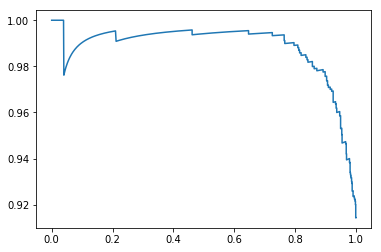

In [31]:
ssd_inception_true = fishing_true + merchant_true + passenger_true + sailing_true + small_true + tug_true + warship_true
ssd_inception_score = fishing_score + merchant_score + passenger_score + sailing_score + small_score + tug_score + warship_score

# data_list = []
# for i in range(len(ssd_inception_true)):
#     data_list.append((ssd_inception_true[i], ssd_inception_score[i]))
# data_list.sort(key=lambda x:x[1], reverse=True)

# ssd_inception_true = []
# ssd_inception_score = []
# for i in range(len(data_list)):
#     ssd_inception_true.append(data_list[i][0])
#     ssd_inception_score.append(data_list[i][1])

y_true = np.array(ssd_inception_true)
y_scores = np.array(ssd_inception_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

plt.plot(recall, precision)

# Descending sort

In [32]:
faster_rcnn_data_list = []
for i in range(len(faster_rcnn_true)):
    faster_rcnn_data_list.append((faster_rcnn_true[i], faster_rcnn_score[i]))
faster_rcnn_data_list.sort(key=lambda x:x[1], reverse=True)

faster_rcnn_true = []
faster_rcnn_score = []
for i in range(len(faster_rcnn_data_list)):
    faster_rcnn_true.append(faster_rcnn_data_list[i][0])
    faster_rcnn_score.append(faster_rcnn_data_list[i][1])

In [33]:
ssd_mobilenet_data_list = []
for i in range(len(ssd_mobilenet_true)):
    ssd_mobilenet_data_list.append((ssd_mobilenet_true[i], ssd_mobilenet_score[i]))
ssd_mobilenet_data_list.sort(key=lambda x:x[1], reverse=True)

ssd_mobilenet_true = []
ssd_mobilenet_score = []
for i in range(len(ssd_mobilenet_data_list)):
    ssd_mobilenet_true.append(ssd_mobilenet_data_list[i][0])
    ssd_mobilenet_score.append(ssd_mobilenet_data_list[i][1])

In [34]:
ssd_inception_data_list = []
for i in range(len(ssd_inception_true)):
    ssd_inception_data_list.append((ssd_inception_true[i], ssd_inception_score[i]))
ssd_inception_data_list.sort(key=lambda x:x[1], reverse=True)

ssd_inception_true = []
ssd_inception_score = []
for i in range(len(ssd_inception_data_list)):
    ssd_inception_true.append(ssd_inception_data_list[i][0])
    ssd_inception_score.append(ssd_inception_data_list[i][1])

# Precision and Recall Curve

## 1) fishing class PR Curve

Faster RCNN ResNet50 AP: 0.9683982663094914
SSD MobileNet AP: 0.13791131162648362
SSD Inception AP: 0.7418294300771131


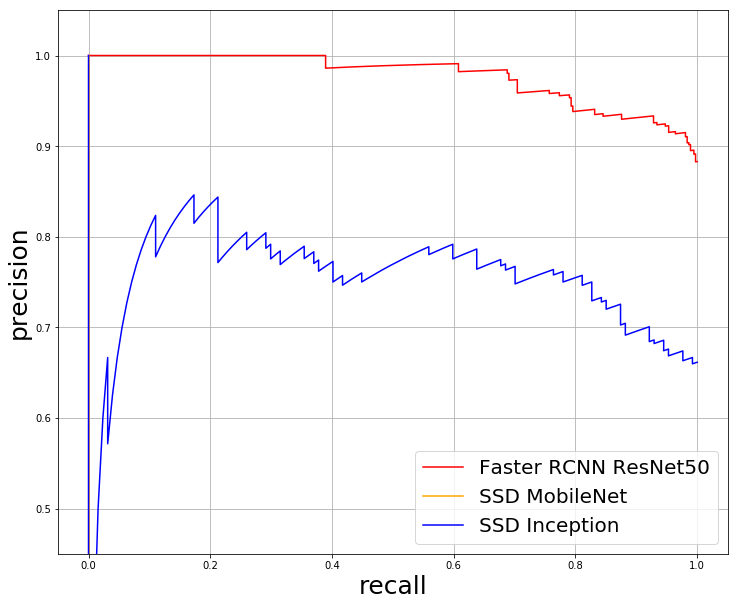

In [35]:
# sns.set()
plt.figure(figsize=(12, 10))
plt.subplot()
plt.grid()

line_color = ['orange', 'brown', 'blue', 'lime', 'navy', 'red', 'grey']
line_width = 3

label_size = 25

legend_loc = 'lower right'
legend_fontsize = 20

y_true = np.array(faster_rcnn_fishing_true)
y_scores = np.array(faster_rcnn_fishing_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
fishing_faster_rcnn_resnet50_ap = sum(precision)/len(precision)
print("Faster RCNN ResNet50 AP:", fishing_faster_rcnn_resnet50_ap)
plt.plot(recall, precision, line_color[5], label='Faster RCNN ResNet50')

y_true = np.array(ssd_mobilenet_fishing_true)
y_scores = np.array(ssd_mobilenet_fishing_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
fishing_ssd_mobilenet_ap = sum(precision)/len(precision)
print("SSD MobileNet AP:", fishing_ssd_mobilenet_ap)
plt.plot(recall, precision, line_color[0], label='SSD MobileNet')

y_true = np.array(ssd_inception_fishing_true)
y_scores = np.array(ssd_inception_fishing_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
fishing_ssd_inception_ap = sum(precision)/len(precision)
print("SSD Inception AP:", fishing_ssd_inception_ap)
plt.plot(recall, precision, line_color[2], label='SSD Inception')

plt.xlabel('recall', size=label_size)
plt.xlim([-0.05, 1.05])
plt.ylabel('precision', size=label_size)
plt.ylim([0.45, 1.05])

plt.legend(loc=legend_loc, fontsize=legend_fontsize)

plt.show()

## 2) merchant class PR Curve

Faster RCNN ResNet50 AP: 0.9634766105697715
SSD MobileNet AP: 0.9898170727100961
SSD Inception AP: 0.9986629161227438


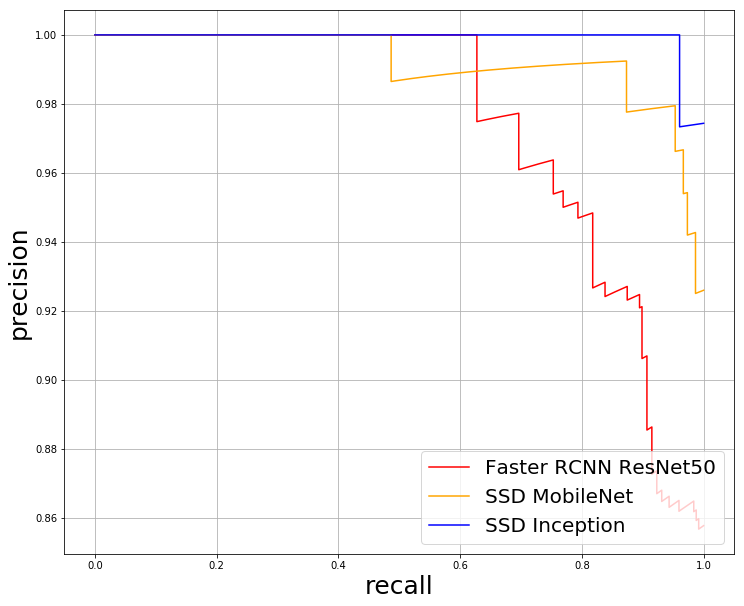

In [36]:
# sns.set()
plt.figure(figsize=(12, 10))
plt.subplot()
plt.grid()

line_color = ['orange', 'brown', 'blue', 'lime', 'navy', 'red', 'grey']
line_width = 3

label_size = 25

legend_loc = 'lower right'
legend_fontsize = 20

y_true = np.array(faster_rcnn_merchant_true)
y_scores = np.array(faster_rcnn_merchant_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
merchant_faster_rcnn_resnet50_ap = sum(precision)/len(precision)
print("Faster RCNN ResNet50 AP:", merchant_faster_rcnn_resnet50_ap)
plt.plot(recall, precision, line_color[5], label='Faster RCNN ResNet50')

y_true = np.array(ssd_mobilenet_merchant_true)
y_scores = np.array(ssd_mobilenet_merchant_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
merchant_ssd_mobilenet_ap = sum(precision)/len(precision)
print("SSD MobileNet AP:", merchant_ssd_mobilenet_ap)
plt.plot(recall, precision, line_color[0], label='SSD MobileNet')

y_true = np.array(ssd_inception_merchant_true)
y_scores = np.array(ssd_inception_merchant_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
merchant_ssd_inception_ap = sum(precision)/len(precision)
print("SSD Inception AP:", merchant_ssd_inception_ap)
plt.plot(recall, precision, line_color[2], label='SSD Inception')

plt.xlabel('recall', size=label_size)
plt.xlim([-0.05, 1.05])
plt.ylabel('precision', size=label_size)
# plt.ylim([-0.05, 1.05])

plt.legend(loc=legend_loc, fontsize=legend_fontsize)

plt.show()

## 3) passenger class PR Curve

Faster RCNN ResNet50 AP: 0.9741845897184037
SSD MobileNet AP: 0.9996952608055062
SSD Inception AP: 0.9994529977948897


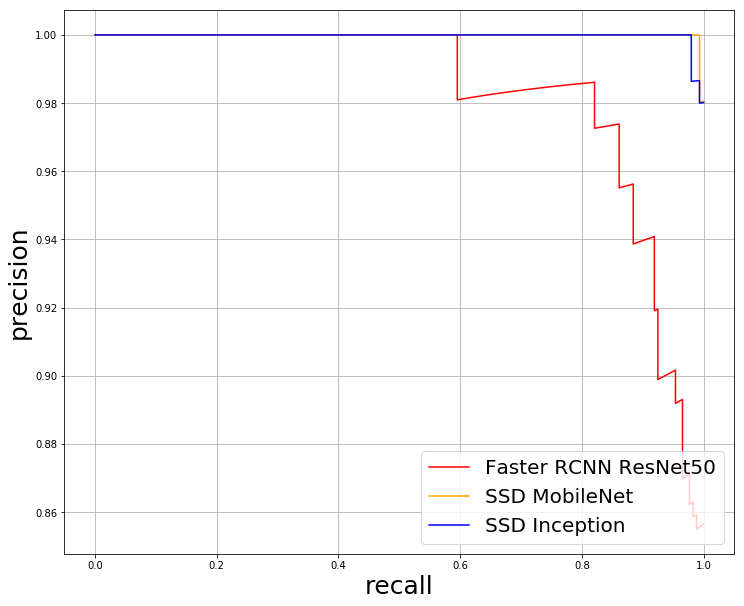

In [37]:
# sns.set()
plt.figure(figsize=(12, 10))
plt.subplot()
plt.grid()

line_color = ['orange', 'brown', 'blue', 'lime', 'navy', 'red', 'grey']
line_width = 3

label_size = 25

legend_loc = 'lower right'
legend_fontsize = 20

y_true = np.array(faster_rcnn_passenger_true)
y_scores = np.array(faster_rcnn_passenger_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
passenger_faster_rcnn_resnet50_ap = sum(precision)/len(precision)
print("Faster RCNN ResNet50 AP:", passenger_faster_rcnn_resnet50_ap)
plt.plot(recall, precision, line_color[5], label='Faster RCNN ResNet50')

y_true = np.array(ssd_mobilenet_passenger_true)
y_scores = np.array(ssd_mobilenet_passenger_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
passenger_ssd_mobilenet_ap = sum(precision)/len(precision)
print("SSD MobileNet AP:", passenger_ssd_mobilenet_ap)
plt.plot(recall, precision, line_color[0], label='SSD MobileNet')

y_true = np.array(ssd_inception_passenger_true)
y_scores = np.array(ssd_inception_passenger_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
passenger_ssd_inception_ap = sum(precision)/len(precision)
print("SSD Inception AP:", passenger_ssd_inception_ap)
plt.plot(recall, precision, line_color[2], label='SSD Inception')

plt.xlabel('recall', size=label_size)
plt.xlim([-0.05, 1.05])
plt.ylabel('precision', size=label_size)
# plt.ylim([-0.05, 1.05])

plt.legend(loc=legend_loc, fontsize=legend_fontsize)

plt.show()

## 4) sailing class PR Curve

Faster RCNN ResNet50 AP: 0.9810574282677755
SSD MobileNet AP: 0.9986523380788681
SSD Inception AP: 1.0


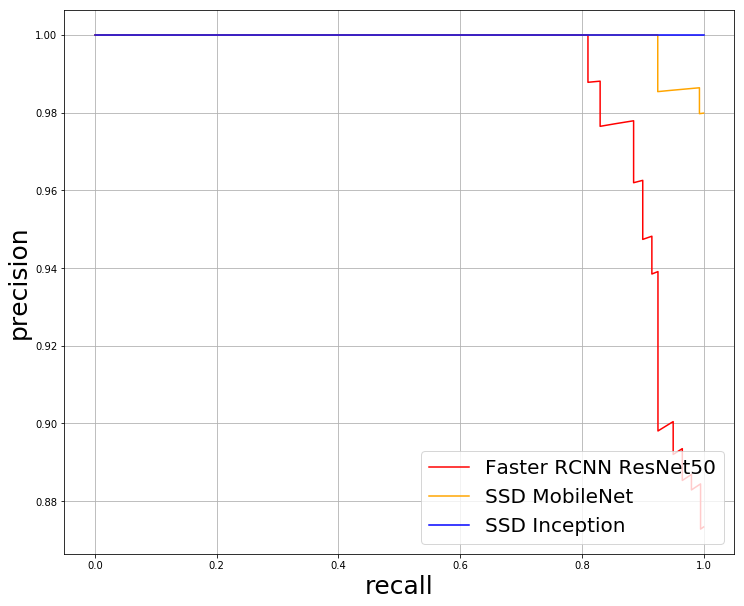

In [38]:
# sns.set()
plt.figure(figsize=(12, 10))
plt.subplot()
plt.grid()

line_color = ['orange', 'brown', 'blue', 'lime', 'navy', 'red', 'grey']
line_width = 3

label_size = 25

legend_loc = 'lower right'
legend_fontsize = 20

y_true = np.array(faster_rcnn_sailing_true)
y_scores = np.array(faster_rcnn_sailing_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
sailing_faster_rcnn_resnet50_ap = sum(precision)/len(precision)
print("Faster RCNN ResNet50 AP:", sailing_faster_rcnn_resnet50_ap)
plt.plot(recall, precision, line_color[5], label='Faster RCNN ResNet50')

y_true = np.array(ssd_mobilenet_sailing_true)
y_scores = np.array(ssd_mobilenet_sailing_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
sailing_ssd_mobilenet_ap = sum(precision)/len(precision)
print("SSD MobileNet AP:", sailing_ssd_mobilenet_ap)
plt.plot(recall, precision, line_color[0], label='SSD MobileNet')

y_true = np.array(ssd_inception_sailing_true)
y_scores = np.array(ssd_inception_sailing_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
sailing_ssd_inception_ap = sum(precision)/len(precision)
print("SSD Inception AP:", sailing_ssd_inception_ap)
plt.plot(recall, precision, line_color[2], label='SSD Inception')

plt.xlabel('recall', size=label_size)
plt.xlim([-0.05, 1.05])
plt.ylabel('precision', size=label_size)
# plt.ylim([-0.05, 1.05])

plt.legend(loc=legend_loc, fontsize=legend_fontsize)

plt.show()

## 5) small class PR Curve

Faster RCNN ResNet50 AP: 0.9956877100110018
SSD MobileNet AP: 0.9535725652881212
SSD Inception AP: 1.0


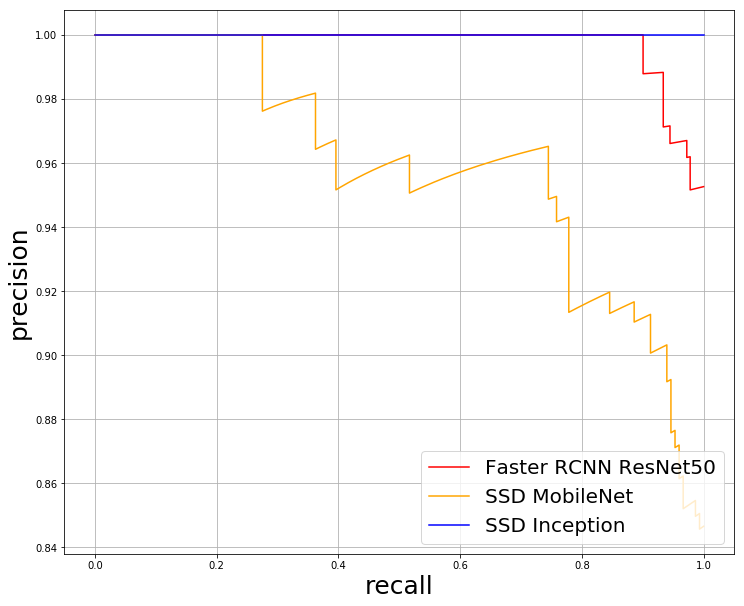

In [39]:
# sns.set()
plt.figure(figsize=(12, 10))
plt.subplot()
plt.grid()

line_color = ['orange', 'brown', 'blue', 'lime', 'navy', 'red', 'grey']
line_width = 3

label_size = 25

legend_loc = 'lower right'
legend_fontsize = 20

y_true = np.array(faster_rcnn_small_true)
y_scores = np.array(faster_rcnn_small_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
small_faster_rcnn_resnet50_ap = sum(precision)/len(precision)
print("Faster RCNN ResNet50 AP:", small_faster_rcnn_resnet50_ap)
plt.plot(recall, precision, line_color[5], label='Faster RCNN ResNet50')

y_true = np.array(ssd_mobilenet_small_true)
y_scores = np.array(ssd_mobilenet_small_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
small_ssd_mobilenet_ap = sum(precision)/len(precision)
print("SSD MobileNet AP:", small_ssd_mobilenet_ap)
plt.plot(recall, precision, line_color[0], label='SSD MobileNet')

y_true = np.array(ssd_inception_small_true)
y_scores = np.array(ssd_inception_small_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
small_ssd_inception_ap = sum(precision)/len(precision)
print("SSD Inception AP:", small_ssd_inception_ap)
plt.plot(recall, precision, line_color[2], label='SSD Inception')

plt.xlabel('recall', size=label_size)
plt.xlim([-0.05, 1.05])
plt.ylabel('precision', size=label_size)
# plt.ylim([-0.05, 1.05])

plt.legend(loc=legend_loc, fontsize=legend_fontsize)

plt.show()

## 6) tug class PR Curve

Faster RCNN ResNet50 AP: 0.9208814570765432
SSD MobileNet AP: 0.9991279634509616
SSD Inception AP: 0.9987560732318254


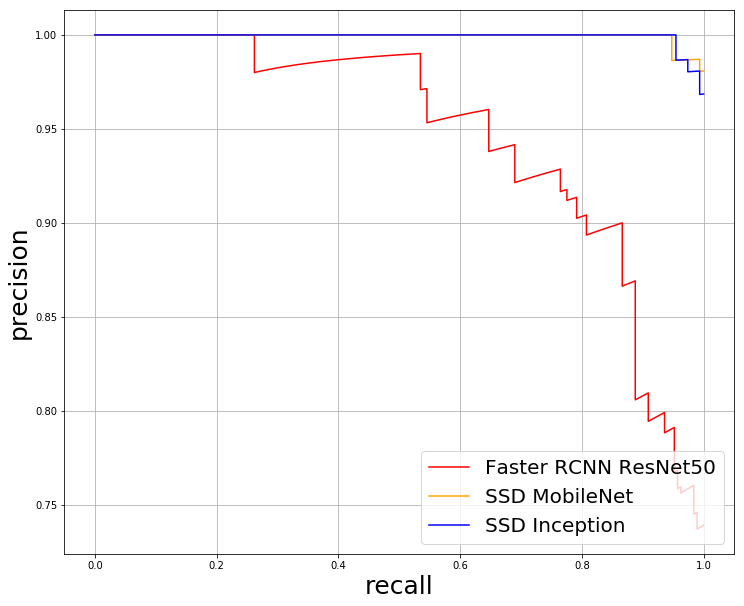

In [40]:
# sns.set()
plt.figure(figsize=(12, 10))
plt.subplot()
plt.grid()

line_color = ['orange', 'brown', 'blue', 'lime', 'navy', 'red', 'grey']
line_width = 3

label_size = 25

legend_loc = 'lower right'
legend_fontsize = 20

y_true = np.array(faster_rcnn_tug_true)
y_scores = np.array(faster_rcnn_tug_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
tug_faster_rcnn_resnet50_ap = sum(precision)/len(precision)
print("Faster RCNN ResNet50 AP:", tug_faster_rcnn_resnet50_ap)
plt.plot(recall, precision, line_color[5], label='Faster RCNN ResNet50')

y_true = np.array(ssd_mobilenet_tug_true)
y_scores = np.array(ssd_mobilenet_tug_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
tug_ssd_mobilenet_ap = sum(precision)/len(precision)
print("SSD MobileNet AP:", tug_ssd_mobilenet_ap)
plt.plot(recall, precision, line_color[0], label='SSD MobileNet')

y_true = np.array(ssd_inception_tug_true)
y_scores = np.array(ssd_inception_tug_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
tug_ssd_inception_ap = sum(precision)/len(precision)
print("SSD Inception AP:", tug_ssd_inception_ap)
plt.plot(recall, precision, line_color[2], label='SSD Inception')

plt.xlabel('recall', size=label_size)
plt.xlim([-0.05, 1.05])
plt.ylabel('precision', size=label_size)
# plt.ylim([-0.05, 1.05])

plt.legend(loc=legend_loc, fontsize=legend_fontsize)

plt.show()

## 7) warship class PR Curve

Faster RCNN ResNet50 AP: 0.9330140063100811
SSD MobileNet AP: 0.9197406235657491
SSD Inception AP: 0.9960297265714128


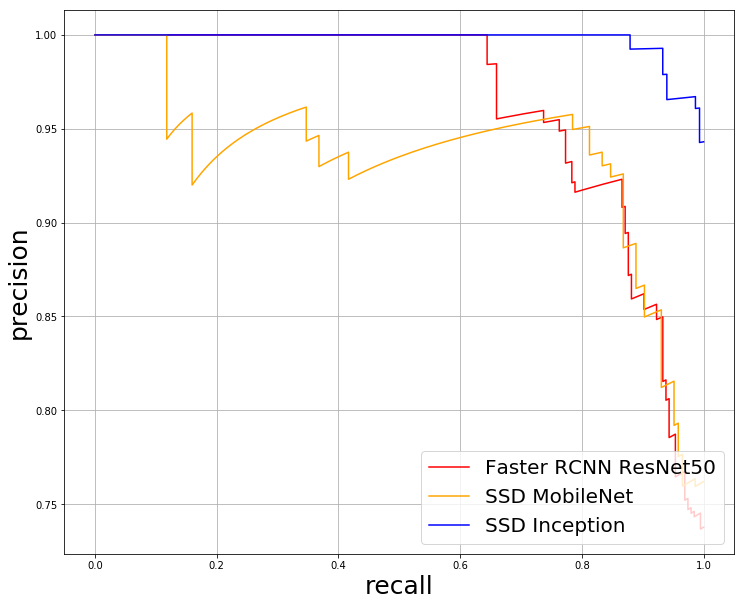

In [41]:
# sns.set()
plt.figure(figsize=(12, 10))
plt.subplot()
plt.grid()

line_color = ['orange', 'brown', 'blue', 'lime', 'navy', 'red', 'grey']
line_width = 3

label_size = 25

legend_loc = 'lower right'
legend_fontsize = 20

y_true = np.array(faster_rcnn_warship_true)
y_scores = np.array(faster_rcnn_warship_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
warship_faster_rcnn_resnet50_ap = sum(precision)/len(precision)
print("Faster RCNN ResNet50 AP:", warship_faster_rcnn_resnet50_ap)
plt.plot(recall, precision, line_color[5], label='Faster RCNN ResNet50')

y_true = np.array(ssd_mobilenet_warship_true)
y_scores = np.array(ssd_mobilenet_warship_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
warship_ssd_mobilenet_ap = sum(precision)/len(precision)
print("SSD MobileNet AP:", warship_ssd_mobilenet_ap)
plt.plot(recall, precision, line_color[0], label='SSD MobileNet')

y_true = np.array(ssd_inception_warship_true)
y_scores = np.array(ssd_inception_warship_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
warship_ssd_inception_ap = sum(precision)/len(precision)
print("SSD Inception AP:", warship_ssd_inception_ap)
plt.plot(recall, precision, line_color[2], label='SSD Inception')

plt.xlabel('recall', size=label_size)
plt.xlim([-0.05, 1.05])
plt.ylabel('precision', size=label_size)
# plt.ylim([-0.05, 1.05])

plt.legend(loc=legend_loc, fontsize=legend_fontsize)

plt.show()

## All class PR Curve

Faster RCNN ResNet50 AP: 0.9648068896588166
SSD MobileNet AP: 0.9257021443851213
SSD Inception AP: 0.9855664227721834


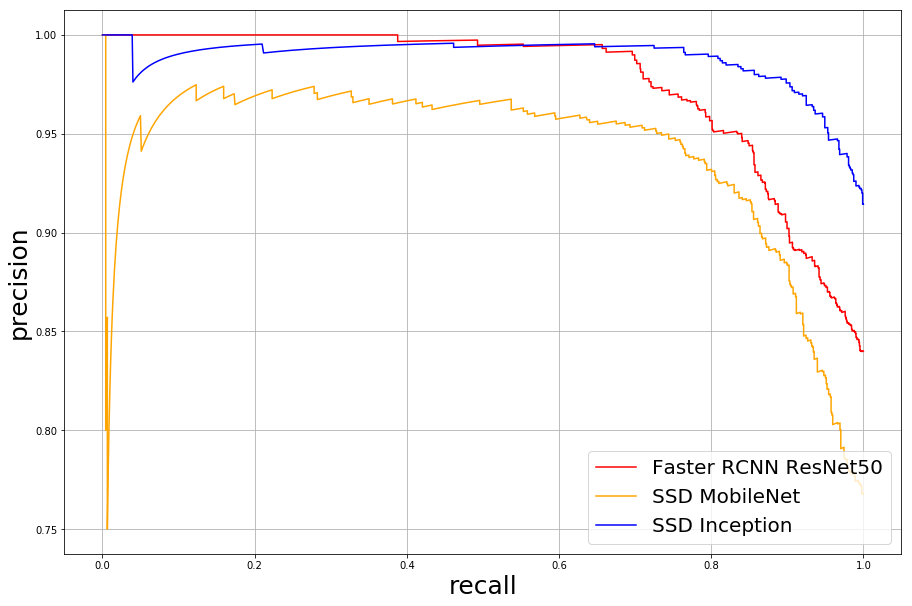

In [42]:
# sns.set()
plt.figure(figsize=(15, 10))
plt.subplot()
plt.grid()

line_color = ['orange', 'brown', 'blue', 'lime', 'navy', 'red', 'grey']
line_width = 3

label_size = 25

legend_loc = 'lower right'
legend_fontsize = 20

y_true = np.array(faster_rcnn_true)
y_scores = np.array(faster_rcnn_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
print("Faster RCNN ResNet50 AP:", sum(precision)/len(precision))
plt.plot(recall, precision, line_color[5], label='Faster RCNN ResNet50')

y_true = np.array(ssd_mobilenet_true)
y_scores = np.array(ssd_mobilenet_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
print("SSD MobileNet AP:", sum(precision)/len(precision))
plt.plot(recall, precision, line_color[0], label='SSD MobileNet')

y_true = np.array(ssd_inception_true)
y_scores = np.array(ssd_inception_score)
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
print("SSD Inception AP:", sum(precision)/len(precision))
plt.plot(recall, precision, line_color[2], label='SSD Inception')

plt.xlabel('recall', size=label_size)
plt.xlim([-0.05, 1.05])
plt.ylabel('precision', size=label_size)
# plt.ylim([0.45, 1.05])

plt.legend(loc=legend_loc, fontsize=legend_fontsize)

plt.show()

In [43]:
faster_rcnn_resnet50_mAP = (fishing_faster_rcnn_resnet50_ap + \
                                            merchant_faster_rcnn_resnet50_ap + \
                                            passenger_faster_rcnn_resnet50_ap + \
                                            sailing_faster_rcnn_resnet50_ap + \
                                            small_faster_rcnn_resnet50_ap + \
                                            tug_faster_rcnn_resnet50_ap + \
                                            warship_faster_rcnn_resnet50_ap) / 7
ssd_mobilenet_mAP = (fishing_ssd_mobilenet_ap + \
                                 merchant_ssd_mobilenet_ap + \
                                 passenger_ssd_mobilenet_ap + \
                                 sailing_ssd_mobilenet_ap + \
                                 small_ssd_mobilenet_ap + \
                                 tug_ssd_mobilenet_ap + \
                                 warship_ssd_mobilenet_ap) / 7
ssd_inception_mAP = (fishing_ssd_inception_ap + \
                                 merchant_ssd_inception_ap + \
                                 passenger_ssd_inception_ap + \
                                 sailing_ssd_inception_ap + \
                                 small_ssd_inception_ap + \
                                 tug_ssd_inception_ap + \
                                 warship_ssd_inception_ap) / 7

print("Faster RCNN ResNet50 mAP:", faster_rcnn_resnet50_mAP)
print("SSD MobileNet mAP:", ssd_mobilenet_mAP)
print("SSD Inception mAP:", ssd_inception_mAP)

Faster RCNN ResNet50 mAP: 0.9623857240375813
SSD MobileNet mAP: 0.8569310193608265
SSD Inception mAP: 0.9621044491139977
